Old file 

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [105]:
def calculate_ccdf_wetvalues(precipitation_data, bins_i_want, filter_small_vals=False):
    # Remove NAN values
    precipitation_data = precipitation_data[~np.isnan(precipitation_data)]
    # Keep only wet values 
    precipitation_data = precipitation_data[precipitation_data >= 0.1]

    # Compute the cumulative distribution function (CDF) using the histogram
    # np.diff(bin_edges): Calculate the differences between bin edges to get bin widths
    # hist * np.diff(bin_edges): Multiply each histogram value by its corresponding bin width
    # np.cumsum(): Compute the cumulative sum of the products
    # cdf: The cumulative distribution function values
    hist, bin_edges = np.histogram(precipitation_data, bins=bins_i_want, density=True)
    cdf = np.cumsum(hist * np.diff(bin_edges))
    
    # Calculate 1 - CDF for CCDF
    ccdf = 1 - cdf
    
    # Find the centre point of each bin for plotting
    bin_centres = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    
    return cdf, ccdf, bin_centres, bin_edges[1:]


def plot_ccdf(axs,results,colors):
    for num, result in enumerate(results):
        axs.scatter(result[3], result[1] ,linewidth = 1,s=3, color = colors[num])
        axs.plot(result[3],result[1] ,linewidth = 1, color = colors[num])
        
# Function to filter patches based on included colors
def create_patches(included_colors):
    return [mpatches.Patch(color=color, label=label) 
            for color, label in labels_and_colors if color in included_colors]        

In [106]:
labels_and_colors = [
    ('black', 'CEH-GEAR (Hourly)'),
    ('darkorange', 'UKCP18 (hourly)'),
    ('purple', 'UKCP18 (30 mins)'),
    ('green', 'NIMROD (30 mins)')]

## Get model data for overlapping and not overlapping time periods

In [107]:
resolution = '2.2km_bng_regridded_12km_masked' # '2.2km_bng_regridded_12km_masked' #2.2km_bng_masked
ukcp18_hrly_2001_2019_jja_GB_12km = np.load(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/UKCP18_hourly/ukcp18_hrly_2001_2019_{resolution}_GB_jja.npy')
ukcp18_30m_2001_2019_jja_GB_12km = np.load(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/UKCP18_30mins/ukcp18_30m_2001_2019_{resolution}_jja_GB.npy')

In [108]:
resolution = '12km_regridded'
cehgear_1990_2014_GB_jja_12km= np.load(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/CEH-GEAR/cehgear_1990-2014_{resolution}_GB_jja.npy')

In [144]:
resolution = "NIMROD_regridded_12km"
NIMROD_2006_2019_jja_GB_12km = np.load(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/NIMROD/NIMROD_2006_2019_jja_GB.npy')
# NIMROD_2006_2019_jja_GB_12km = np.load(f'/nfs/a319/gy17m2a/PhD/ProcessedData/PDF_Plotting/NIMROD/NIMROD_2006_2019_{resolution}_jja_GB.npy')
# NIMROD_2006_2019_jja_GB_12km = NIMROD_2006_2019_jja_GB_12km[NIMROD_2006_2019_jja_GB_12km <= 100]

## Calculate CDFs and CCDFs

In [147]:
bins_i_want =  [0, 0.1, 2, 3, 7, 10,15, 21, 35,1000]
low_bins_i_want = [0, 0.1,  0.95, 1.05, 1.15,2]

In [148]:
NIMROD_2006_2019_jja_GB_12km_results_50 = calculate_ccdf_wetvalues(NIMROD_2006_2019_jja_GB_12km,bins_i_want)
# ukcp18_hrly_2001_2019_jja_GB_12km_results_50 = calculate_ccdf_wetvalues(ukcp18_hrly_2001_2019_jja_GB_12km,bins_i_want)
# ukcp18_30m_2001_2019_jja_GB_12km_results_50 = calculate_ccdf_wetvalues(ukcp18_30m_2001_2019_jja_GB_12km, bins_i_want)
# cehgear_1990_2014_GB_jja_12km_results_50  = calculate_ccdf_wetvalues(cehgear_1990_2014_GB_jja_12km, bins_i_want)

In [119]:
# bins_i_want =  [0, 0.1, 2, 3, 7, 10,15, 21, 35,np.nanmax(ukcp18_hrly_2001_2019_jja_GB_12km)]
bins_i_want =  [0, 0.1, 2, 3, 7, 10,15, 21, 35,50]
low_bins_i_want = [0, 0.1,  0.95, 1.05, 1.15,2]

In [120]:
NIMROD_2006_2019_jja_GB_12km_results_50 = calculate_ccdf_wetvalues(NIMROD_2006_2019_jja_GB_12km,bins_i_want)
# ukcp18_hrly_2001_2019_jja_GB_12km_results_70 = calculate_ccdf_wetvalues(ukcp18_hrly_2001_2019_jja_GB_12km,bins_i_want)
# ukcp18_30m_2001_2019_jja_GB_12km_results_70 = calculate_ccdf_wetvalues(ukcp18_30m_2001_2019_jja_GB_12km, bins_i_want)
# cehgear_1990_2014_GB_jja_12km_results_70  = calculate_ccdf_wetvalues(cehgear_1990_2014_GB_jja_12km, bins_i_want)

## All

Text(0.5, 0, 'Intensity (mm/hr))')

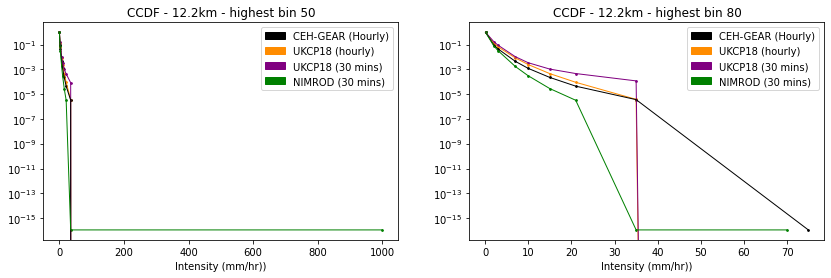

In [149]:
fig, axs = plt.subplots(ncols = 2, figsize=(14,4))

results = [ukcp18_hrly_2001_2019_jja_GB_12km_results_50, ukcp18_30m_2001_2019_jja_GB_12km_results_50,
           cehgear_1990_2014_GB_jja_12km_results_50,NIMROD_2006_2019_jja_GB_12km_results_50]
colors = ['darkorange', 'purple', 'black', 'green']
plot_ccdf(axs[0],results, colors)

axs[0].set_yscale('log')
axs[0].set_title('CCDF - 12.2km - highest bin 50')
patches = create_patches(['black', 'purple', 'darkorange', 'green'])
axs[0].legend(handles=patches);
axs[0].set_xlabel('Intensity (mm/hr))')

results = [ukcp18_hrly_2001_2019_jja_GB_12km_results_70, ukcp18_30m_2001_2019_jja_GB_12km_results_70,
           cehgear_1990_2014_GB_jja_12km_results_70,NIMROD_2006_2019_jja_GB_12km_results_70]
plot_ccdf(axs[1],results, colors)
axs[1].set_yscale('log')
axs[1].set_title('CCDF - 12.2km - highest bin 80')
patches = create_patches(['black', 'purple', 'darkorange', 'green'])
axs[1].legend(handles=patches);
axs[1].set_xlabel('Intensity (mm/hr))')